# CIFAR10 Model

## Background

The CIFAR-10 dataset consists of **60,000 color images in 32x32 pixel format**, divided into **10 classes**, with each class containing 6,000 images. 
50.000 of these images are for training and 10.000 for testing.

These classes are: 
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck. 

Each class has exactly the same number of images, meaning that the CIFAR-10 dataset can generally be considered as balanced.

This balanced distribution ensures that the model is trained evenly across different classes and not influenced by the frequency of certain classes.

Therefore, **random sampling** can be used for the train-validation-test split.

How to proceed: (WIP)

- [ ] load training and test data from the CIFAR10 dataset and split into 80% training and 20% validation data
- [ ] add data loader
- [ ] show first 10 train images with matplotlib to get an idea about the images
- [ ] decide on an architecture
- [ ] train the model
- [ ] test the model
- [ ] save

## Step 1: Load the data from the CIFAR10 dataset and split into 80% training and 20% validation data

### Download the dataset will show a javascript error which can be ignored for now

In [6]:
import torch
import torchvision.transforms
from torchvision import datasets

train_data_percentage = 0.8
random_seed = 42

classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# setting a random seed for the train-validation-split to make sure the results will stay the same
torch.manual_seed(random_seed)

# transforms the images into a tensor and normalizes the pixels
# normalizing takes place by substracting the mean from the images and dividing the standard deviation which helps to center and scale the data
transforms = torchvision.transforms.Compose(
    [torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# downloading the 50.000 train images from the CIFAR10 dataset
full_train_dataset = datasets.CIFAR10("data", train=True, download=True, transform=transforms)

train_size = int(train_data_percentage * len(full_train_dataset))
val_size = len(full_train_dataset) - train_size

# split the train images into train and validation
train_dataset, val_dataset = torch.utils.data.random_split(
    full_train_dataset, 
    [train_size, val_size], 
    generator=torch.Generator().manual_seed(random_seed)
)

# downloading the 10.000 test images from the CIFAR10 dataset
test_dataset = datasets.CIFAR10("data", train=False, download=True, transform=transforms)


print(f'train_size: {train_size} and validation_size: {val_size}')


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting data/cifar-10-python.tar.gz to data
Files already downloaded and verified
train_size: 40000 and validation_size: 10000


# Step: 2 Use a data loader

A data loader efficiently loads and preprocesses data, allowing for batching, shuffling, and parallelizing data loading operations during neural network training.

In [7]:
batch_size_train = 10
batch_size_val = 5
batch_size_test = 5

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, shuffle=True)
valid_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size_val, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test, shuffle=False)


## Step 3: Show the 10 training images

In [8]:
def imshow(img, sub):
    # Unnormalisierung des Bildes
    img = img / 2 + 0.5
    # Korrekte Transposition der Dimensionen
    img = np.transpose(img, (1, 2, 0))
    # Anzeigen des Bildes mit geeigneter Interpolation
    sub.imshow(img, interpolation='nearest')
    sub.axis("off")

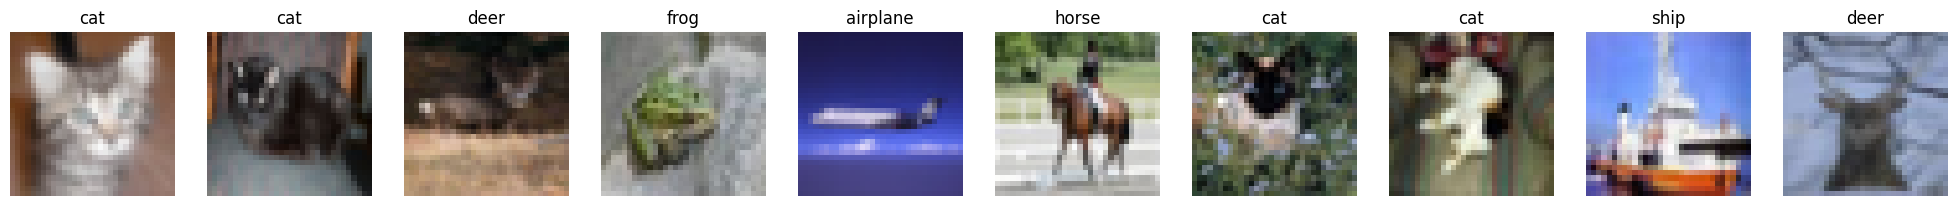

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# render diagrams directly in notebook
%matplotlib inline 

# obtain one batch of training images
dataiter = iter(train_dataloader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# helper function to un-normalize and display an image
def imshow(img, sub):
    img = img / 2 + 0.5  # unnormalize
    img = np.transpose(img, (1, 2, 0))
    sub.imshow(img, interpolation='nearest') # convert from Tensor image
    sub.axis("off")

# plot the images in the batch, along with the corresponding labels
fig, subs = plt.subplots(1, 10, figsize=(25, 4))
for i, sub in enumerate(subs.flatten()):
    imshow(images[i], sub)
    sub.set_title(classes[labels[i]])


Text(0.5, 1.0, 'cat')

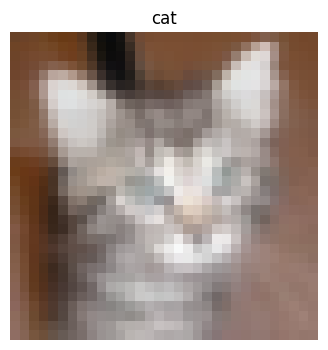

In [10]:
fig, sub = plt.subplots(1, 1, figsize=(5, 4))
imshow(images[0], sub)
sub.set_title(classes[labels[0]])